In [1]:
from preprocessing import *
from contrast import *
from decomposition import *
from viz import *
from scipy.io import loadmat
alt.data_transformers.enable('data_server')
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
gl_10 = loadmat("../../data/raw/GL_10.mat")

**The functions can be found in the `.py` files in this folder. Decomposition contains the orthogonalization functions, the peel-off function, and separation, refinement, and decomposition functions which are probably of highest interest.**

## Running decomposition without peel-off, and with Gram-Schmidt orthogonalization and skew

**Using a PNR threshold of 20. After fixing the PNR function most PNRs are around 20 and the ones that are accepted are in the 22 to 25 range. After updating SIL to use noise and peaks rather than peaks from cluster A and cluster B (large and small peaks), almost all vectors have SIL above 0.9.**

In [3]:
output = decomposition(
    gl_10["SIG"],
    thresh=20,
    M=64,
    peel=False,
    contrast_fun=skew,
    ortho_fun=gram_schmidt,
    sil_pnr=False,
    verbose=True,
    max_iter_sep=10,
    max_iter_ref=20,
)

Centred.
Extended.
Whitened.
Fixed-point algorithm converged after 4 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
Fixed-point algorithm converged after 6 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
PNR: 10.695745207024512
SIL: 0.9031984065930797
cv_curr = 3.084034610875631
cv_prev = 0
Fixed-point algorithm converged after 7 iterations.
PNR: 22.055315382132527
SIL: 0.9912902010035147
cv_curr = 6.567544487716341
cv_prev = 6.567542859542175
Extracted source at iteration 3.
Fixed-point algorithm converged after 4 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
Fixed-point algorithm converged after 9 iterations.
PNR: 22.011848903059605
SIL: 0.9911602286616368
cv_curr = 6.567440239912146
cv_prev = 6.549732491420965
Extracted source at iteration 5.
PNR: 10.532021636796411
SIL: 0.8995480692961201
cv_curr = 3.5471729139237897
cv_prev = 0
PNR: 10.453525959990207
SIL: 0.8976253612262944

In [4]:
output

{'B': array([[ 0.01480249,  0.00462398,  0.00356345],
        [-0.00093815,  0.00202801,  0.00790194],
        [-0.0042585 , -0.00523448,  0.01999771],
        ...,
        [-0.01478458, -0.00380087,  0.0059183 ],
        [-0.00733128, -0.00180754, -0.01937415],
        [-0.00536589,  0.00204569, -0.02509625]]),
 'MUPulses': array([array([ 15921,  16328,  20469,  20926,  77923,  78082,  87636,  87780,
                88032,  88237,  88476,  88666,  88889,  89116,  89296,  89531,
                89677,  89888,  90068,  90227,  90435,  90639,  90866,  91068,
                91256,  91447,  91666,  91845,  92076,  92339,  92610,  92857,
                93172,  93457,  93657,  93882,  94076,  94292,  94538,  94772,
                94943,  95188,  95412,  95612,  95863,  96150,  96404,  96860,
                97104,  97380,  97670,  97958,  98217,  98688,  99782,  99983,
               100178, 100437, 100607, 100841, 101012, 101250, 101410, 101619,
               101834, 102047, 102243, 102

**As we can see in the output dictionary, there are three unique separation vectors (three unique columns of B). The first two have very similar firing times as seen in MUPulses, while the last only has three firings, which can be seen in the MUAP shapes which are very noisy.**

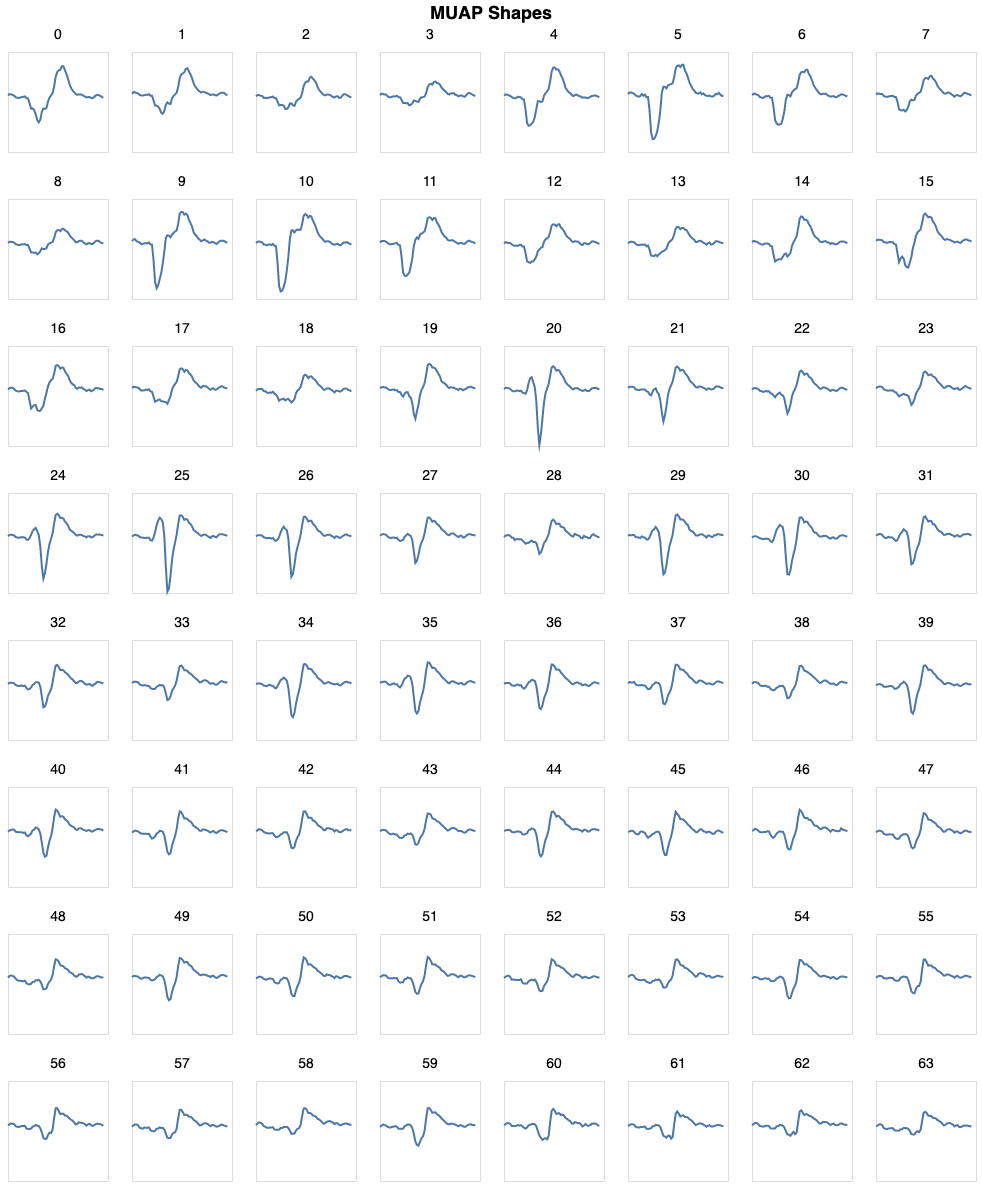

In [5]:
shape_dict = muap_dict(gl_10["SIG"], output["MUPulses"])
muap_plot(shape_dict, 0, count=64)

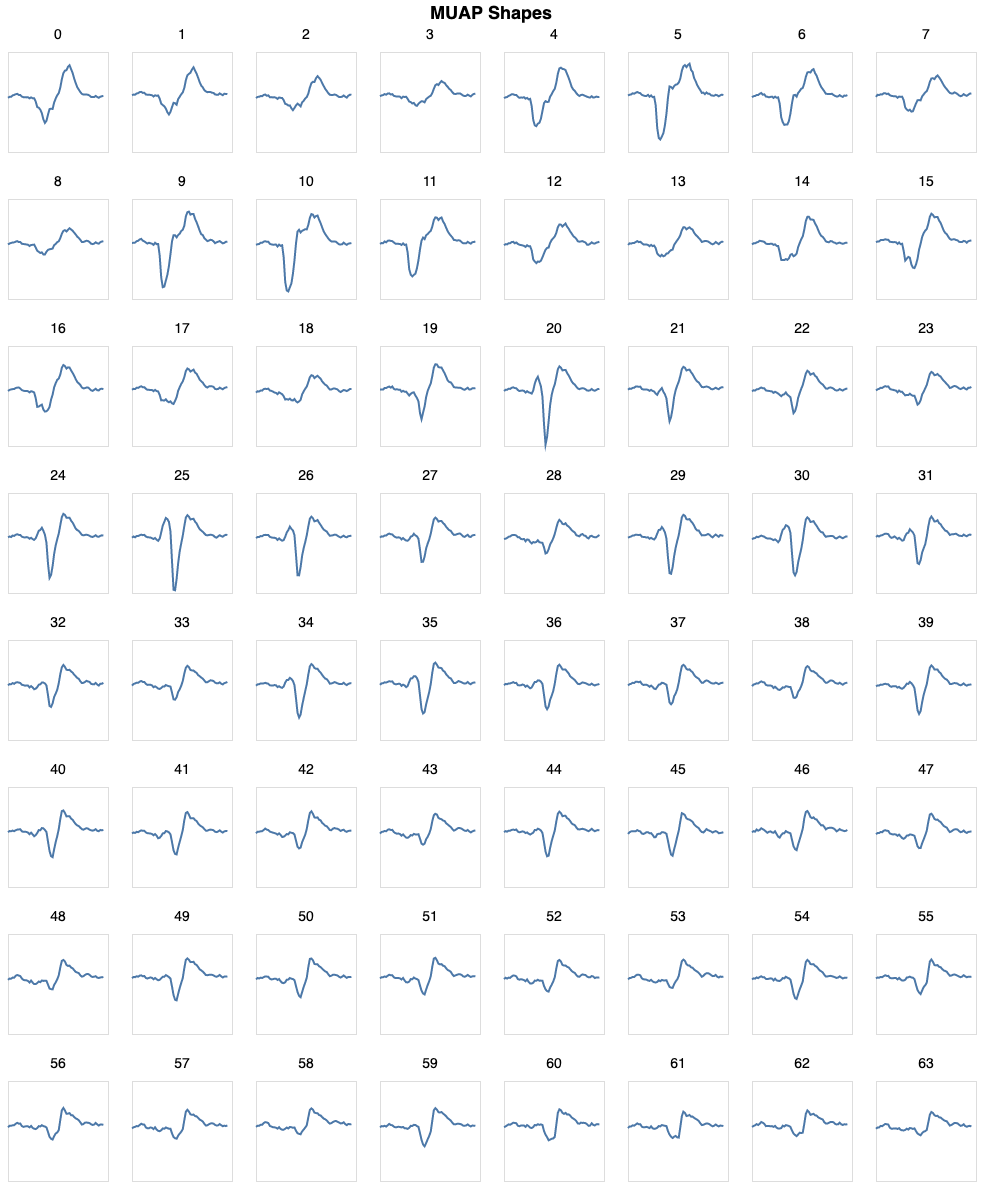

In [6]:
muap_plot(shape_dict, 1, count=64)

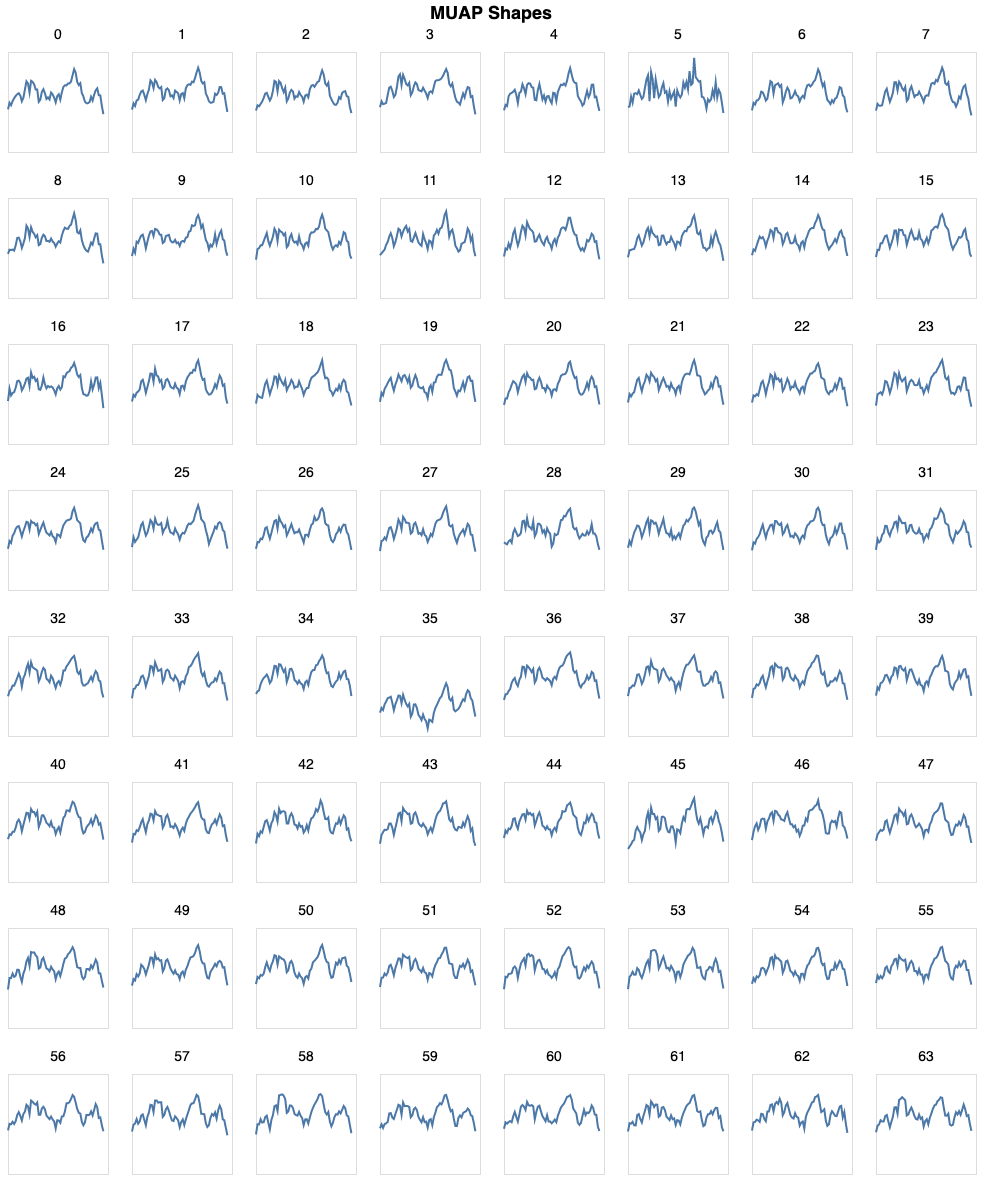

In [7]:
muap_plot(shape_dict, 2, count=64)

## Running decomposition with peel-off, Gram-Schmidt orthogonalization, and skew

In [8]:
output = decomposition(
    gl_10["SIG"],
    thresh=20,
    M=64,
    peel=True,
    contrast_fun=skew,
    ortho_fun=gram_schmidt,
    sil_pnr=False,
    verbose=True,
    max_iter_sep=10,
    max_iter_ref=20,
)

Centred.
Extended.
Whitened.
Fixed-point algorithm converged after 4 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
Fixed-point algorithm converged after 6 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
PNR: 10.685119932391075
SIL: 0.9029385170792813
cv_curr = 3.094964691457692
cv_prev = 0
Fixed-point algorithm converged after 7 iterations.
PNR: 22.055315382132527
SIL: 0.9912902010035147
cv_curr = 6.567544487716341
cv_prev = 6.567542859542175
Extracted source at iteration 3.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.037496733722882
SIL: 0.9912765927965789
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 4.
PNR: 22.03749465436315
SIL: 0.9912765907184342
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 5.
PNR: 22.03749465256351
SIL: 0.9912765907166353
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at 

/Users/danielking/emgdecompy/notebooks/for-jsb/decomposition.py:210: RuntimeWarning: invalid value encountered in true_divide
  w = w / norms


In [9]:
output

{'B': array([[ 0.01480249, -0.02981573, -0.0303026 , ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00093815, -0.03029455, -0.03031669, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.0042585 , -0.03038786, -0.03031943, ..., -0.03031695,
         -0.03031695, -0.03031695],
        ...,
        [-0.01478458, -0.03070543, -0.03032878, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00733128, -0.03047186, -0.03032191, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00536589, -0.03041804, -0.03032032, ..., -0.03031695,
         -0.03031695, -0.03031695]]),
 'MUPulses': array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        ...,
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 

In [20]:
output["B"].shape

(1088, 15)

In [19]:
output["MUPulses"]

array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       ...,
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771]], dtype=object)

**This method extracts 15 motor units. Looking at MUPulses we can see each motor unit fires at the same time - it is not worth visualizing. Below we can see that eventually each element of the separation vectors converge on the same value.**

In [10]:
output["B"]

array([[ 0.01480249, -0.02981573, -0.0303026 , ..., -0.03031695,
        -0.03031695, -0.03031695],
       [-0.00093815, -0.03029455, -0.03031669, ..., -0.03031695,
        -0.03031695, -0.03031695],
       [-0.0042585 , -0.03038786, -0.03031943, ..., -0.03031695,
        -0.03031695, -0.03031695],
       ...,
       [-0.01478458, -0.03070543, -0.03032878, ..., -0.03031695,
        -0.03031695, -0.03031695],
       [-0.00733128, -0.03047186, -0.03032191, ..., -0.03031695,
        -0.03031695, -0.03031695],
       [-0.00536589, -0.03041804, -0.03032032, ..., -0.03031695,
        -0.03031695, -0.03031695]])

In [11]:
output["B"][:, 0]

array([ 0.01480249, -0.00093815, -0.0042585 , ..., -0.01478458,
       -0.00733128, -0.00536589])

In [12]:
output["B"][:, 1]

array([-0.02981573, -0.03029455, -0.03038786, ..., -0.03070543,
       -0.03047186, -0.03041804])

In [13]:
output["B"][:, 2]

array([-0.0303026 , -0.03031669, -0.03031943, ..., -0.03032878,
       -0.03032191, -0.03032032])

In [14]:
output["B"][:, 3]

array([-0.03031653, -0.03031695, -0.03031703, ..., -0.0303173 ,
       -0.0303171 , -0.03031705])

In [15]:
output["B"][:, 4]

array([-0.03031694, -0.03031695, -0.03031696, ..., -0.03031696,
       -0.03031696, -0.03031696])

In [16]:
output["B"][:, 5]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

In [17]:
output["B"][:, 6]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

In [18]:
output["B"][:, 7]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

In [21]:
output["B"][:, 14]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

## Running decomposition with peel-off, deflation, and skew

In [22]:
output = decomposition(
    gl_10["SIG"],
    thresh=20,
    M=64,
    peel=True,
    contrast_fun=skew,
    ortho_fun=deflate,
    sil_pnr=False,
    verbose=True,
    max_iter_sep=10,
    max_iter_ref=20,
)

Centred.
Extended.
Whitened.
Fixed-point algorithm converged after 4 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
Fixed-point algorithm converged after 6 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
PNR: 10.69042176546724
SIL: 0.9030682884621617
cv_curr = 3.0898952147396392
cv_prev = 0
Fixed-point algorithm converged after 7 iterations.
PNR: 22.055315382132527
SIL: 0.9912902010035147
cv_curr = 6.567544487716341
cv_prev = 6.567542859542175
Extracted source at iteration 3.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.037496733722882
SIL: 0.9912765927965789
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 4.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.03749465436315
SIL: 0.9912765907184342
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 5.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.03749465256

/Users/danielking/emgdecompy/notebooks/for-jsb/decomposition.py:210: RuntimeWarning: invalid value encountered in true_divide
  w = w / norms


In [23]:
output

{'B': array([[ 0.01480249, -0.02981573, -0.0303026 , ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00093815, -0.03029455, -0.03031669, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.0042585 , -0.03038786, -0.03031943, ..., -0.03031695,
         -0.03031695, -0.03031695],
        ...,
        [-0.01478458, -0.03070543, -0.03032878, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00733128, -0.03047186, -0.03032191, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00536589, -0.03041804, -0.03032032, ..., -0.03031695,
         -0.03031695, -0.03031695]]),
 'MUPulses': array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        ...,
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 

In [25]:
output["B"].shape

(1088, 15)

In [27]:
output["MUPulses"]

array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       ...,
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771]], dtype=object)

**We're getting the same sort of results as with Gram-Schmidt and peel-off.**

In [28]:
output["B"][:, 7]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

In [29]:
output["B"][:, 14]

array([-0.03031695, -0.03031695, -0.03031695, ..., -0.03031695,
       -0.03031695, -0.03031695])

## Running decomposition with peel-off and no orthogonalization of any kind

In [30]:
output = decomposition(
    gl_10["SIG"],
    thresh=20,
    M=64,
    peel=True,
    contrast_fun=skew,
    ortho_fun=None,
    sil_pnr=False,
    verbose=True,
    max_iter_sep=10,
    max_iter_ref=20,
)

Centred.
Extended.
Whitened.
Fixed-point algorithm converged after 4 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
Fixed-point algorithm converged after 6 iterations.
PNR: 30.72397135955503
SIL: 0.9990281142507793
cv_curr = 0
cv_prev = 0
PNR: 10.69042176546724
SIL: 0.9030682884621617
cv_curr = 3.0898952147396392
cv_prev = 0
Fixed-point algorithm converged after 7 iterations.
PNR: 22.055315382132527
SIL: 0.9912902010035147
cv_curr = 6.567544487716341
cv_prev = 6.567542859542175
Extracted source at iteration 3.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.037496733722882
SIL: 0.9912765927965789
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 4.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.03749465436315
SIL: 0.9912765907184342
cv_curr = 6.567544491702079
cv_prev = 6.567544491702079
Extracted source at iteration 5.
Fixed-point algorithm converged after 2 iterations.
PNR: 22.03749465256

/Users/danielking/emgdecompy/notebooks/for-jsb/decomposition.py:210: RuntimeWarning: invalid value encountered in true_divide
  w = w / norms


In [31]:
output

{'B': array([[ 0.01480249, -0.02981573, -0.0303026 , ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00093815, -0.03029455, -0.03031669, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.0042585 , -0.03038786, -0.03031943, ..., -0.03031695,
         -0.03031695, -0.03031695],
        ...,
        [-0.01478458, -0.03070543, -0.03032878, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00733128, -0.03047186, -0.03032191, ..., -0.03031695,
         -0.03031695, -0.03031695],
        [-0.00536589, -0.03041804, -0.03032032, ..., -0.03031695,
         -0.03031695, -0.03031695]]),
 'MUPulses': array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        ...,
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 135286, 135771],
        [15921, 16328, 20469, ..., 134930, 

In [32]:
output["B"].shape

(1088, 15)

In [33]:
output["MUPulses"]

array([[15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       ...,
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771],
       [15921, 16328, 20469, ..., 134930, 135286, 135771]], dtype=object)

**Again same sort of results.  If peel-off is applied, the algorithm seems to converge on the same vectors no matter the orthogonalization function. I'm not sure why this is happening or why with no peel-off it still only converges on the same motor unit twice.**